# FAANG's Stock Market Performance
By Alvaro Rodriguez

## Business Understanding

## Data Understanding

## Data Preparation

Stock market performance analysis includes calulating close stock prices, moving averages, and measuring volatility

### Collect Real-Time Stock Market Data
Using the yfinance API, the data can be collected straight from Yahoo finance.

In [1]:
import pandas as pd
import yfinance as yf
from datetime import datetime

In [2]:
# Start date of the stock price 12 months ago to current date
start_date = datetime.now() - pd.DateOffset(months=12)
end_date = datetime.now()

In [3]:
# Download the historical stock price data for FAANG for the last year
tickers = ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG']

df_list = []

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    df_list.append(data)

df = pd.concat(df_list, keys=tickers, names=['Ticker', 'Date'])
print(df.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                         Open        High         Low       Close   Adj Close   
Ticker Date                                                                     
META   2022-05-19  191.199997  195.289993  189.600006  191.289993  191.289993  \
       2022-05-20  194.970001  197.910004  187.869995  193.539993  193.539993   
       2022-05-23  195.190002  196.990005  191.240005  196.229996  196.229996   
       2022-05-24  180.550003  183.679993  176.110001  181.279999  181.279999   
       2022-05-25  180.399994  185.449997  179.320007  183.830002  183.830002   

                     Volume  
Ticker Date                  
META   2022-05-19  24446900

### Dataframe Information

In [4]:
df

Open        High         Low       Close   Adj Close   
Ticker Date                                                                     
META   2022-05-19  191.199997  195.289993  189.600006  191.289993  191.289993  \
       2022-05-20  194.970001  197.910004  187.869995  193.539993  193.539993   
       2022-05-23  195.190002  196.990005  191.240005  196.229996  196.229996   
       2022-05-24  180.550003  183.679993  176.110001  181.279999  181.279999   
       2022-05-25  180.399994  185.449997  179.320007  183.830002  183.830002   
...                       ...         ...         ...         ...         ...   
GOOG   2023-05-15  116.489998  118.794998  116.480003  116.959999  116.959999   
       2023-05-16  116.830002  121.199997  116.830002  120.089996  120.089996   
       2023-05-17  120.180000  122.279999  119.459999  121.480003  121.480003   
       2023-05-18  121.559998  123.900002  121.489998  123.519997  123.519997   
       2023-05-19  124.199997  126.478996  122.720001  123.250000  123.250000   

                     Volume  
Ticker Date                  
META   2022-05-19  24446900  
       2022-05-20  31465600  
       2022-05-23  25059200  
       2022-05-24  50406300  
       2022-05-25  28030200  
...                     ...  
GOOG   2023-05-15  22107900  
       2023-05-16  32370100  
       2023-05-17  26659600  
       2023-05-18  27014500  
       2023-05-19  29341368  

[1260 rows x 6 columns]

In [5]:
df.head()

Open        High         Low       Close   Adj Close   
Ticker Date                                                                     
META   2022-05-19  191.199997  195.289993  189.600006  191.289993  191.289993  \
       2022-05-20  194.970001  197.910004  187.869995  193.539993  193.539993   
       2022-05-23  195.190002  196.990005  191.240005  196.229996  196.229996   
       2022-05-24  180.550003  183.679993  176.110001  181.279999  181.279999   
       2022-05-25  180.399994  185.449997  179.320007  183.830002  183.830002   

                     Volume  
Ticker Date                  
META   2022-05-19  24446900  
       2022-05-20  31465600  
       2022-05-23  25059200  
       2022-05-24  50406300  
       2022-05-25  28030200

In [6]:
df.tail()

Open        High         Low       Close   Adj Close   
Ticker Date                                                                     
GOOG   2023-05-15  116.489998  118.794998  116.480003  116.959999  116.959999  \
       2023-05-16  116.830002  121.199997  116.830002  120.089996  120.089996   
       2023-05-17  120.180000  122.279999  119.459999  121.480003  121.480003   
       2023-05-18  121.559998  123.900002  121.489998  123.519997  123.519997   
       2023-05-19  124.199997  126.478996  122.720001  123.250000  123.250000   

                     Volume  
Ticker Date                  
GOOG   2023-05-15  22107900  
       2023-05-16  32370100  
       2023-05-17  26659600  
       2023-05-18  27014500  
       2023-05-19  29341368

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1260 entries, ('META', Timestamp('2022-05-19 00:00:00')) to ('GOOG', Timestamp('2023-05-19 00:00:00'))
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1260 non-null   float64
 1   High       1260 non-null   float64
 2   Low        1260 non-null   float64
 3   Close      1260 non-null   float64
 4   Adj Close  1260 non-null   float64
 5   Volume     1260 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 73.1+ KB


In [8]:
df.describe()

Open         High          Low        Close    Adj Close   
count  1260.000000  1260.000000  1260.000000  1260.000000  1260.000000  \
mean    159.658827   162.474735   157.295359   160.016428   159.911890   
std      69.523001    70.857705    68.372947    69.729606    69.745511   
min      82.800003    83.480003    81.430000    81.820000    81.820000   
25%     107.430000   109.227127   105.626411   107.699999   107.699999   
50%     140.695000   142.985001   138.455002   140.870003   140.670128   
75%     179.467503   183.704994   176.174999   180.167500   180.167500   
max     372.410004   379.429993   363.809998   371.290009   371.290009   

             Volume  
count  1.260000e+03  
mean   4.327758e+07  
std    3.208544e+07  
min    2.657900e+06  
25%    1.946228e+07  
50%    3.332090e+07  
75%    6.456648e+07  
max    2.323166e+08

In [9]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [10]:
df.index

MultiIndex([('META', '2022-05-19'),
            ('META', '2022-05-20'),
            ('META', '2022-05-23'),
            ('META', '2022-05-24'),
            ('META', '2022-05-25'),
            ('META', '2022-05-26'),
            ('META', '2022-05-27'),
            ('META', '2022-05-31'),
            ('META', '2022-06-01'),
            ('META', '2022-06-02'),
            ...
            ('GOOG', '2023-05-08'),
            ('GOOG', '2023-05-09'),
            ('GOOG', '2023-05-10'),
            ('GOOG', '2023-05-11'),
            ('GOOG', '2023-05-12'),
            ('GOOG', '2023-05-15'),
            ('GOOG', '2023-05-16'),
            ('GOOG', '2023-05-17'),
            ('GOOG', '2023-05-18'),
            ('GOOG', '2023-05-19')],
           names=['Ticker', 'Date'], length=1260)

In [11]:
df.shape

(1260, 6)

In [12]:
# Date column is in the index column in the DataFrame
df = df.reset_index()
df

Ticker       Date        Open        High         Low       Close   
0      META 2022-05-19  191.199997  195.289993  189.600006  191.289993  \
1      META 2022-05-20  194.970001  197.910004  187.869995  193.539993   
2      META 2022-05-23  195.190002  196.990005  191.240005  196.229996   
3      META 2022-05-24  180.550003  183.679993  176.110001  181.279999   
4      META 2022-05-25  180.399994  185.449997  179.320007  183.830002   
...     ...        ...         ...         ...         ...         ...   
1255   GOOG 2023-05-15  116.489998  118.794998  116.480003  116.959999   
1256   GOOG 2023-05-16  116.830002  121.199997  116.830002  120.089996   
1257   GOOG 2023-05-17  120.180000  122.279999  119.459999  121.480003   
1258   GOOG 2023-05-18  121.559998  123.900002  121.489998  123.519997   
1259   GOOG 2023-05-19  124.199997  126.478996  122.720001  123.250000   

       Adj Close    Volume  
0     191.289993  24446900  
1     193.539993  31465600  
2     196.229996  25059200  
3     181.279999  50406300  
4     183.830002  28030200  
...          ...       ...  
1255  116.959999  22107900  
1256  120.089996  32370100  
1257  121.480003  26659600  
1258  123.519997  27014500  
1259  123.250000  29341368  

[1260 rows x 8 columns]

### Plot Stock Market Performance

In [13]:
# Performance in the Stock Market of all the companies
import plotly.express as px
fig = px.line(df, x='Date',
             y='Close',
             color='Ticker',
             title="Stock Market Performance of FANNG for the Last Year")
fig.show();

In [14]:
# Faceted area chart of the companies to compare the performance of different companies
fig = px.area(df, x='Date', y='Close', color='Ticker',
             facet_col='Ticker',
             labels={'Date':'Date', 'Close':'Closing Price', 'Ticker':'Company'},
             title='Stock Prices for FAANG')

fig.show();

### Analyze Moving Averages

In [15]:
# Analyze moving averages; provides a useful way to identify trends and patterns in each company's stock price movements over the year

df['MA10'] = df.groupby('Ticker')['Close'].rolling(window=10).mean().reset_index(0, drop=True)
df['MA20'] = df.groupby('Ticker')['Close'].rolling(window=20).mean().reset_index(0, drop=True)

for ticker, group in df.groupby('Ticker'):
    print(f'Moving Averages for {ticker}')
    print(group[['MA10', 'MA20']])

Moving Averages for AAPL
           MA10        MA20
252         NaN         NaN
253         NaN         NaN
254         NaN         NaN
255         NaN         NaN
256         NaN         NaN
..          ...         ...
499  171.257001  168.944000
500  171.610002  169.224001
501  172.134003  169.477000
502  173.060004  169.897001
503  173.219003  170.404001

[252 rows x 2 columns]
Moving Averages for AMZN
           MA10        MA20
504         NaN         NaN
505         NaN         NaN
506         NaN         NaN
507         NaN         NaN
508         NaN         NaN
..          ...         ...
751  107.322001  106.083501
752  108.299001  106.638501
753  109.484001  107.198500
754  110.899001  107.915501
755  111.958001  108.380001

[252 rows x 2 columns]
Moving Averages for GOOG
            MA10       MA20
1008         NaN        NaN
1009         NaN        NaN
1010         NaN        NaN
1011         NaN        NaN
1012         NaN        NaN
...          ...        ...
1255  110

In [16]:
for ticker, group in df.groupby('Ticker'):
    fig = px.line(group, x='Date', y=['Close', 'MA10', 'MA20'], 
                  title=f"{ticker} Moving Averages")
    fig.show()

The output shows four separate graphs for each company in FAANG. When the MA10 crosses above the MA20, it is considered a bullish signal.
When the MA10 rosses below the MA20, it is considered a bearish signal.

### Analyze Volatility of Each Company in FAANG

In [17]:
# Analyze Volatility of each company
df['Volatility'] = df.groupby('Ticker')['Close'].pct_change().rolling(window=10).std().reset_index(0, drop=True)
fig = px.line(df, x='Date', y='Volatility', 
              color='Ticker', 
              title='Volatility of All Companies')
fig.show()

Volatility is the measure of how much and how often the stock price fluctuates over a given period of time. High volatility indicates that the stock experiences large and frequent price movements, while low volatility indicates that the market experiences smaller price movements.

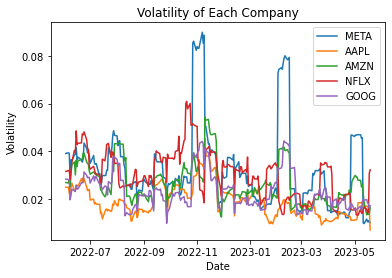

In [18]:
import matplotlib.pyplot as plt

# Analyze Volatility of each company
df['Volatility'] = df.groupby('Ticker')['Close'].pct_change().rolling(window=10).std().reset_index(0, drop=True)

# Iterate over each company
for ticker in df['Ticker'].unique():
    company_df = df[df['Ticker'] == ticker]
    volatility_values = company_df['Volatility'].to_numpy()  # Convert to NumPy array
    dates = company_df['Date'].to_numpy()  # Convert 'Date' column to NumPy array
    plt.plot(dates, volatility_values, label=ticker)

plt.title('Volatility of Each Company')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show();

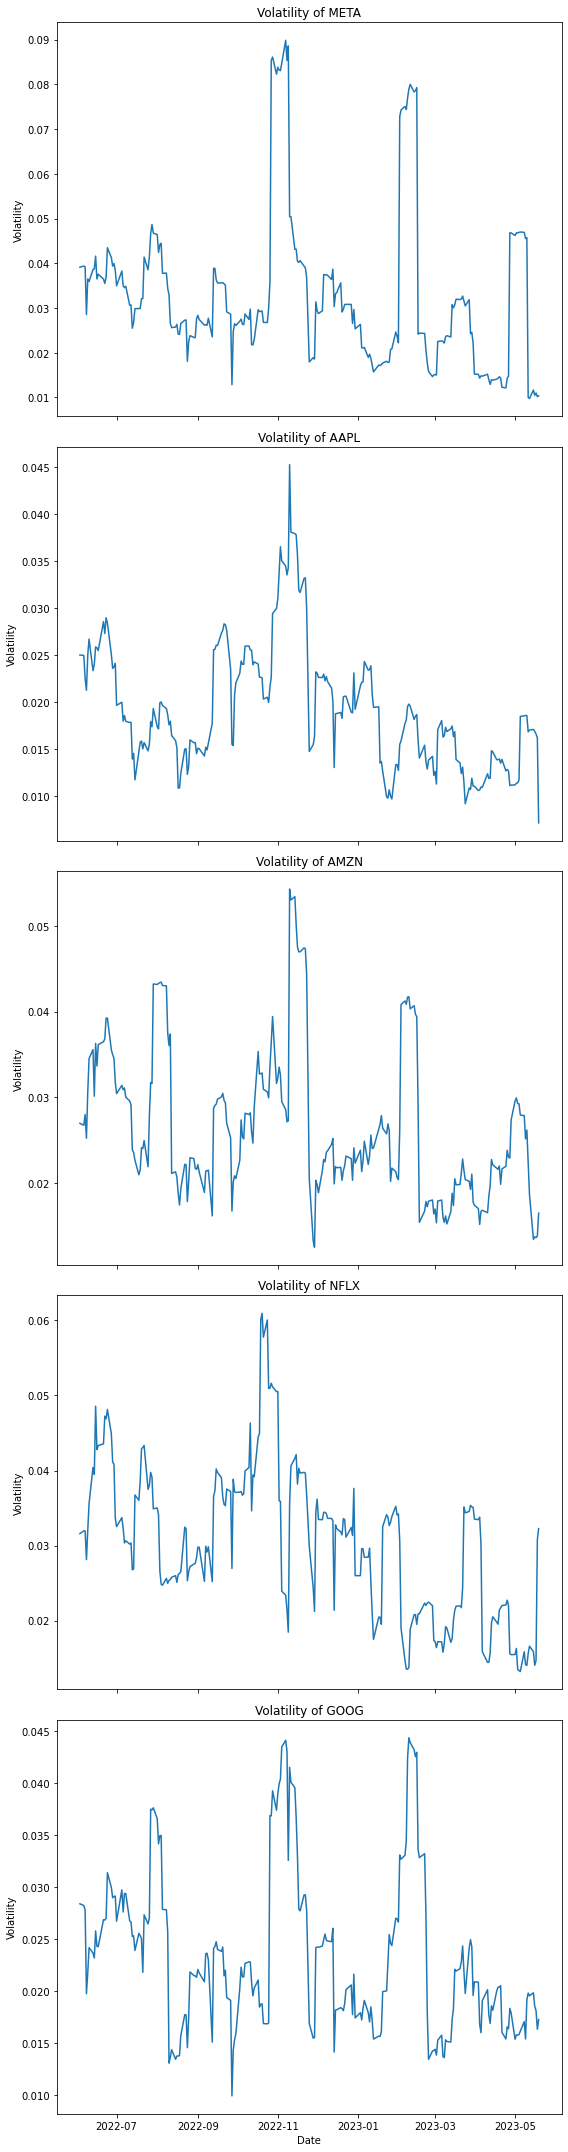

In [19]:
# Analyze Volatility of each company
df['Volatility'] = df.groupby('Ticker')['Close'].pct_change().rolling(window=10).std().reset_index(0, drop=True)

# Get unique tickers
tickers = df['Ticker'].unique()

# Determine the number of subplots based on the number of tickers
num_subplots = len(tickers)

# Create subplots
fig, axs = plt.subplots(num_subplots, 1, figsize=(8, 6*num_subplots), sharex=True)

# Iterate over each ticker and plot
for i, ticker in enumerate(tickers):
    company_df = df[df['Ticker'] == ticker]
    volatility_values = company_df['Volatility'].to_numpy()
    dates = company_df['Date'].to_numpy()
    
    # Select the appropriate subplot
    ax = axs[i] if num_subplots > 1 else axs
    
    # Plot the data
    ax.plot(dates, volatility_values)
    ax.set_title(f'Volatility of {ticker}')
    ax.set_ylabel('Volatility')

# Set the common x-axis label
axs[-1].set_xlabel('Date')

plt.tight_layout()
plt.show();

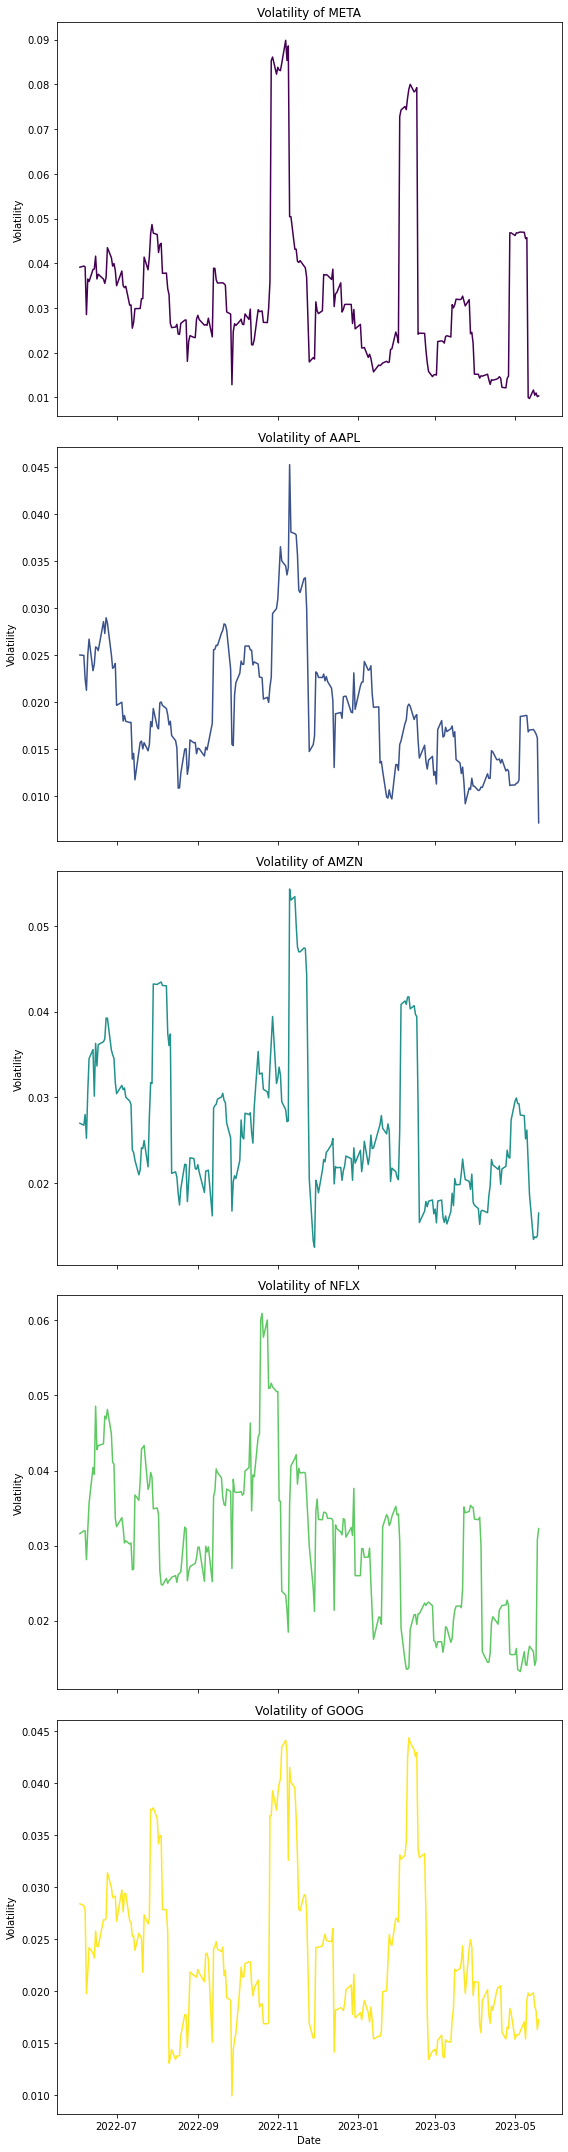

In [20]:
import numpy as np

# Analyze Volatility of each company
df['Volatility'] = df.groupby('Ticker')['Close'].pct_change().rolling(window=10).std().reset_index(0, drop=True)

# Get unique tickers
tickers = df['Ticker'].unique()

# Determine the number of subplots based on the number of tickers
num_subplots = len(tickers)

# Create a colormap using the 'viridis' color map
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, num_subplots))

# Create subplots
fig, axs = plt.subplots(num_subplots, 1, figsize=(8, 6*num_subplots), sharex=True)

# Iterate over each ticker and plot
for i, ticker in enumerate(tickers):
    company_df = df[df['Ticker'] == ticker]
    volatility_values = company_df['Volatility'].to_numpy()
    dates = company_df['Date'].to_numpy()
    
    # Select the appropriate subplot
    ax = axs[i] if num_subplots > 1 else axs
    
    # Plot the data with the corresponding color
    ax.plot(dates, volatility_values, color=colors[i])
    ax.set_title(f'Volatility of {ticker}')
    ax.set_ylabel('Volatility')

# Set the common x-axis label
axs[-1].set_xlabel('Date')

plt.tight_layout()
plt.show()

## Simple Model

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Ticker      1260 non-null   object        
 1   Date        1260 non-null   datetime64[ns]
 2   Open        1260 non-null   float64       
 3   High        1260 non-null   float64       
 4   Low         1260 non-null   float64       
 5   Close       1260 non-null   float64       
 6   Adj Close   1260 non-null   float64       
 7   Volume      1260 non-null   int64         
 8   MA10        1215 non-null   float64       
 9   MA20        1165 non-null   float64       
 10  Volatility  1210 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 108.4+ KB


In [22]:
df.set_index('Date', inplace=True)

In [23]:
fig = px.line(df, x=df.index, y='Close', color='Ticker', title='Stock Prices Over Time')
fig.show();

### Time-Series Line Plot

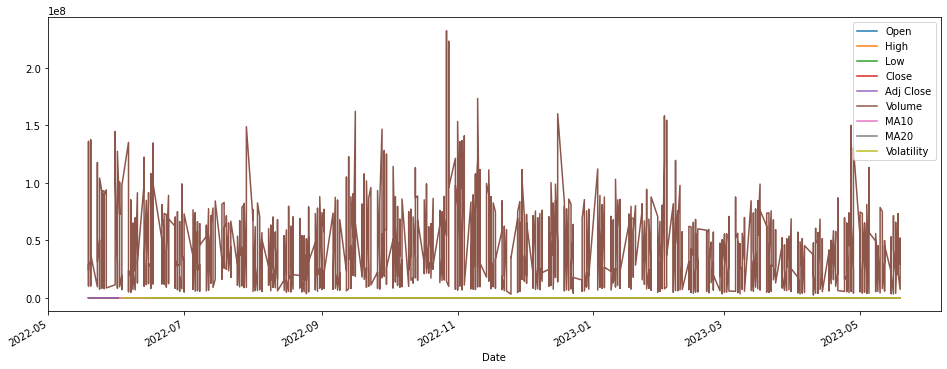

In [24]:
# Draw a line plot using df and .plot() method 
import matplotlib.pyplot as plt
%matplotlib inline

df.plot(figsize = (16,6));

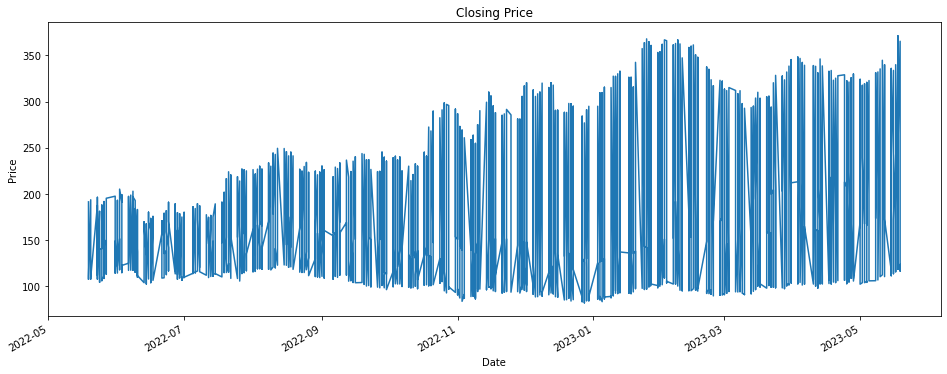

In [25]:
df['Close'].plot(figsize=(16, 6))
plt.title('Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show();

### Time-series Dot Plot

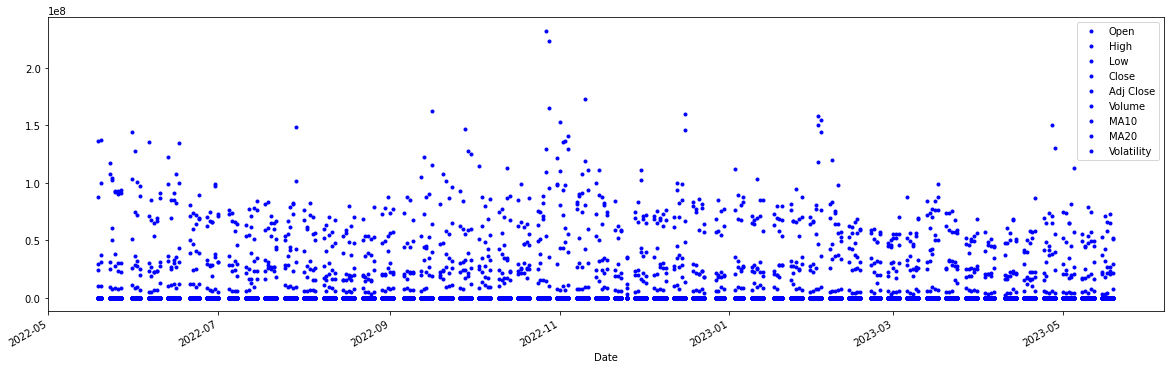

In [26]:
# Draw a dot plot using temp and .plot() method 
df.plot(figsize = (20,6), style = '.b');

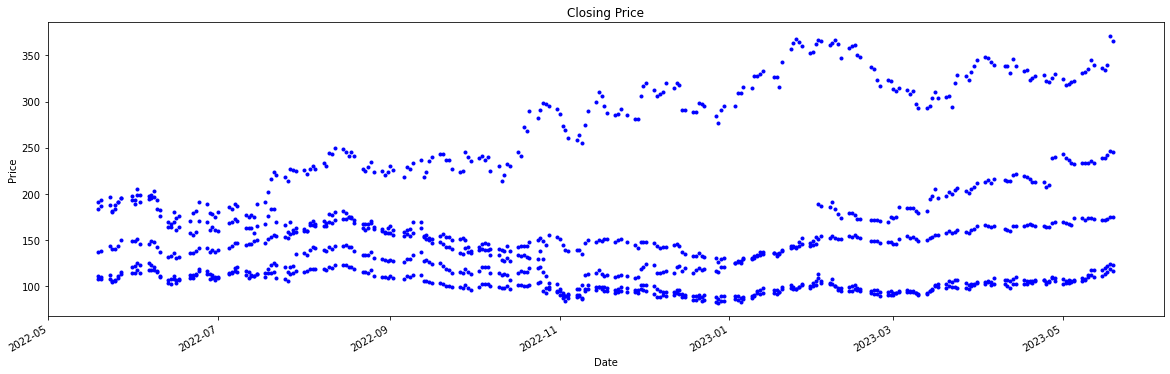

In [27]:
df['Close'].plot(figsize=(20, 6), style= '.b')
plt.title('Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show();

### Separated Annual Yearly Percentage Change

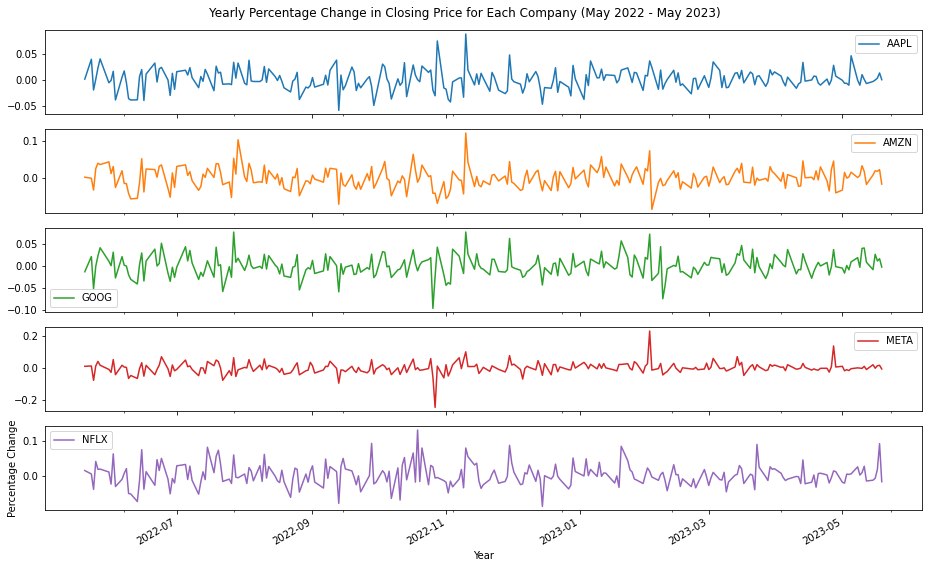

In [28]:
import pandas as pd

# Filter the DataFrame for the desired time range
start_date = pd.to_datetime('2022-05-01')
end_date = pd.to_datetime('2023-05-31')
df_filtered = df.loc[(df.index.get_level_values('Date') >= start_date) & (df.index.get_level_values('Date') <= end_date)]

# Group the filtered DataFrame by 'Ticker' column
groups = df_filtered.groupby('Ticker')

# Create a new DataFrame to store the annual percentage changes for each company
df_annual_pct_change = pd.DataFrame()

# Iterate over each group
for ticker, group in groups:
    # Calculate the percentage change of the closing prices
    pct_change = group['Close'].pct_change()
    # Align the length of values with the length of the index
    pct_change = pct_change.reindex(group.index.get_level_values('Date'))
    # Store the annual percentage changes in the new DataFrame
    df_annual_pct_change[ticker] = pct_change

# Plot the annual percentage changes as subplots
df_annual_pct_change.plot(figsize=(13, 8), subplots=True, legend=True)

# Set the plot title and labels
plt.suptitle('Yearly Percentage Change in Closing Price for Each Company (May 2022 - May 2023)')
plt.xlabel('Year')
plt.ylabel('Percentage Change')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show();

### All Annual Together

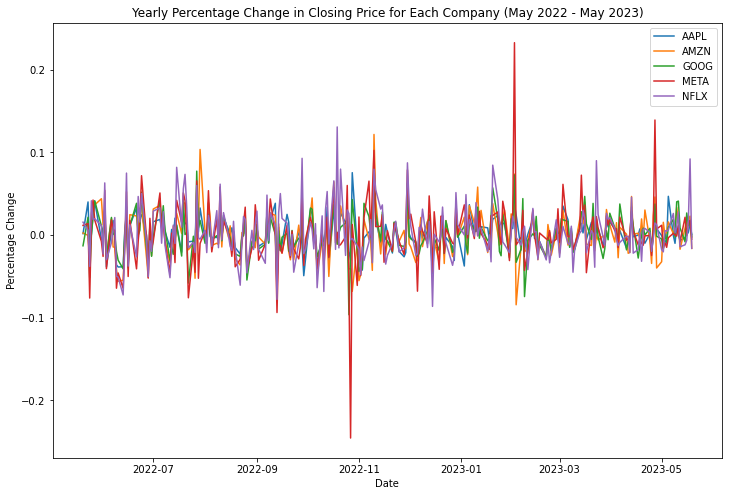

In [29]:
# Filter the DataFrame for the desired time range
start_date = pd.to_datetime('2022-05-01')
end_date = pd.to_datetime('2023-05-31')
df_filtered = df.loc[(df.index >= start_date) & (df.index <= end_date)]

# Group the filtered DataFrame by 'Ticker' column
groups = df_filtered.groupby('Ticker')

# Create a new DataFrame to store the annual percentage changes for each company
df_annual_pct_change = pd.DataFrame()

# Iterate over each group
for ticker, group in groups:
    # Calculate the percentage change of the closing prices
    pct_change = group['Close'].pct_change()
    # Align the length of values with the length of the index
    pct_change = pct_change.reindex(group.index)
    # Store the annual percentage changes in the new DataFrame
    df_annual_pct_change[ticker] = pct_change

# Plot the annual percentage changes
plt.figure(figsize=(12, 8))
for column in df_annual_pct_change.columns:
    plt.plot(df_annual_pct_change.index.to_numpy(), df_annual_pct_change[column].values, label=column)

# Set the plot title and labels
plt.title('Yearly Percentage Change in Closing Price for Each Company (May 2022 - May 2023)')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()

# Display the plot
plt.show();

### Showing Distributions 
- Check for normality
- Check on raw and transformed data

In [30]:
df

Ticker        Open        High         Low       Close   Adj Close   
Date                                                                            
2022-05-19   META  191.199997  195.289993  189.600006  191.289993  191.289993  \
2022-05-20   META  194.970001  197.910004  187.869995  193.539993  193.539993   
2022-05-23   META  195.190002  196.990005  191.240005  196.229996  196.229996   
2022-05-24   META  180.550003  183.679993  176.110001  181.279999  181.279999   
2022-05-25   META  180.399994  185.449997  179.320007  183.830002  183.830002   
...           ...         ...         ...         ...         ...         ...   
2023-05-15   GOOG  116.489998  118.794998  116.480003  116.959999  116.959999   
2023-05-16   GOOG  116.830002  121.199997  116.830002  120.089996  120.089996   
2023-05-17   GOOG  120.180000  122.279999  119.459999  121.480003  121.480003   
2023-05-18   GOOG  121.559998  123.900002  121.489998  123.519997  123.519997   
2023-05-19   GOOG  124.199997  126.478996  122.720001  123.250000  123.250000   

              Volume        MA10       MA20  Volatility  
Date                                                     
2022-05-19  24446900         NaN        NaN         NaN  
2022-05-20  31465600         NaN        NaN         NaN  
2022-05-23  25059200         NaN        NaN         NaN  
2022-05-24  50406300         NaN        NaN         NaN  
2022-05-25  28030200         NaN        NaN         NaN  
...              ...         ...        ...         ...  
2023-05-15  22107900  110.376500  108.29275    0.019817  
2023-05-16  32370100  111.787499  109.04125    0.018516  
2023-05-17  26659600  113.323499  109.86425    0.018093  
2023-05-18  27014500  115.154499  110.74525    0.016305  
2023-05-19  29341368  116.857999  111.61225    0.017240  

[1260 rows x 10 columns]

### Histogram

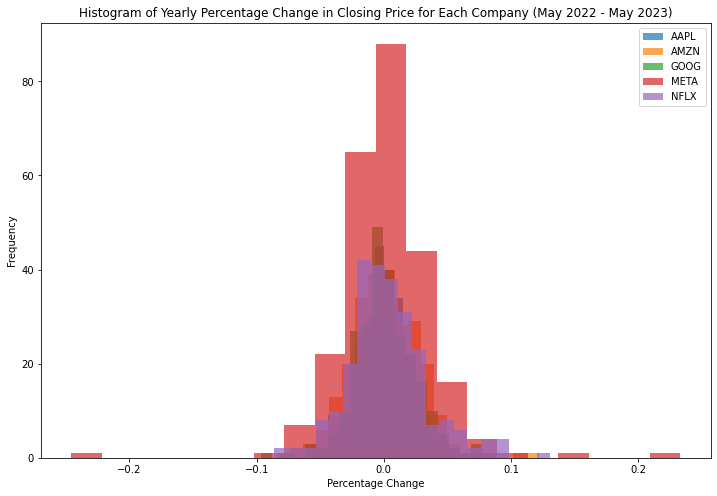

In [31]:
# Filter the DataFrame for the desired time range
start_date = pd.to_datetime('2022-05-01')
end_date = pd.to_datetime('2023-05-31')
df_filtered = df.loc[(df.index >= start_date) & (df.index <= end_date)]

# Group the filtered DataFrame by 'Ticker' column
groups = df_filtered.groupby('Ticker')

# Create a new DataFrame to store the annual percentage changes for each company
df_annual_pct_change = pd.DataFrame()

# Iterate over each group
for ticker, group in groups:
    # Calculate the percentage change of the closing prices
    pct_change = group['Close'].pct_change()
    # Align the length of values with the length of the index
    pct_change = pct_change.reindex(group.index)
    # Store the annual percentage changes in the new DataFrame
    df_annual_pct_change[ticker] = pct_change

# Plot a histogram for each company
plt.figure(figsize=(12, 8))
for column in df_annual_pct_change.columns:
    plt.hist(df_annual_pct_change[column].dropna(), bins=20, alpha=0.7, label=column)

# Set the plot title and labels
plt.title('Histogram of Yearly Percentage Change in Closing Price for Each Company (May 2022 - May 2023)')
plt.xlabel('Percentage Change')
plt.ylabel('Frequency')
plt.legend()

# Display the plot
plt.show();

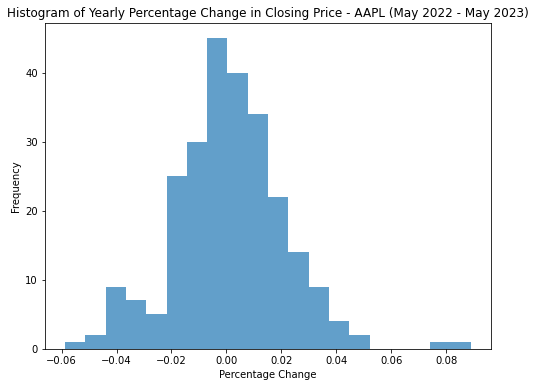

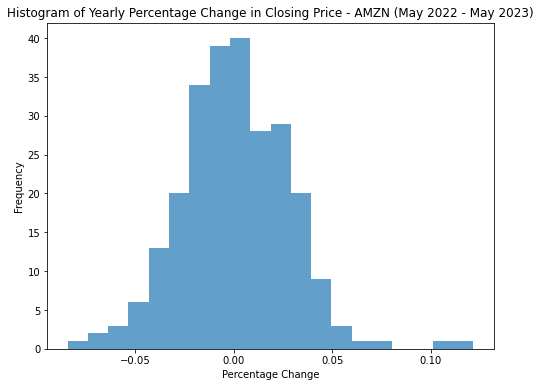

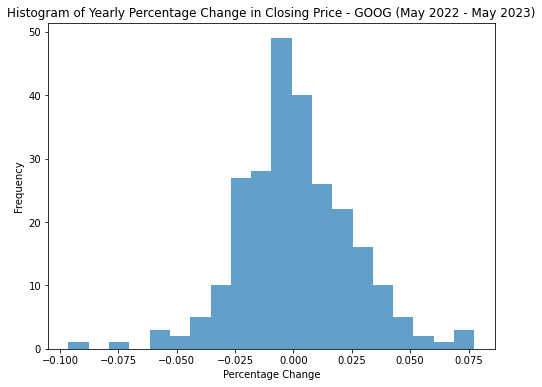

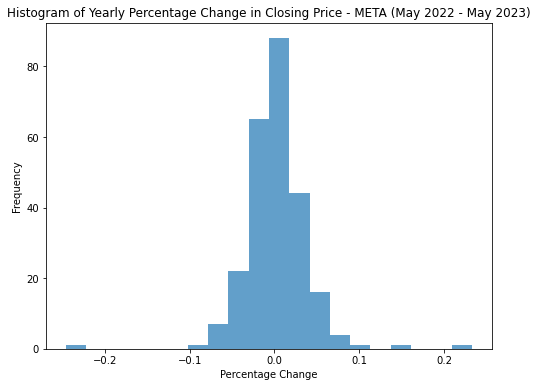

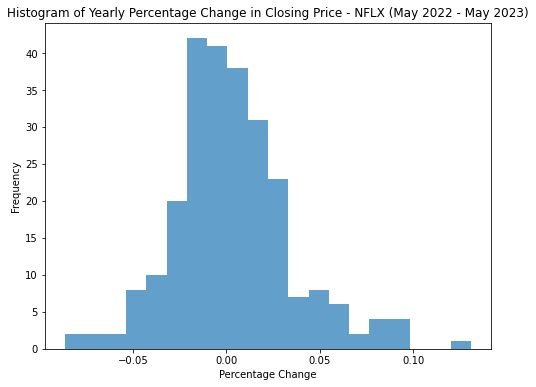

In [32]:
# Filter the DataFrame for the desired time range
start_date = pd.to_datetime('2022-05-01')
end_date = pd.to_datetime('2023-05-31')
df_filtered = df.loc[(df.index >= start_date) & (df.index <= end_date)]

# Group the filtered DataFrame by 'Ticker' column
groups = df_filtered.groupby('Ticker')

# Iterate over each group and create separate histograms
for ticker, group in groups:
    # Calculate the percentage change of the closing prices
    pct_change = group['Close'].pct_change()
    # Align the length of values with the length of the index
    pct_change = pct_change.reindex(group.index)
    
    # Plot a histogram for the current company
    plt.figure(figsize=(8, 6))
    plt.hist(pct_change.dropna(), bins=20, alpha=0.7)
    
    # Set the plot title and labels
    plt.title(f'Histogram of Yearly Percentage Change in Closing Price - {ticker} (May 2022 - May 2023)')
    plt.xlabel('Percentage Change')
    plt.ylabel('Frequency')
    
    # Display the plot for the current company
    plt.show();

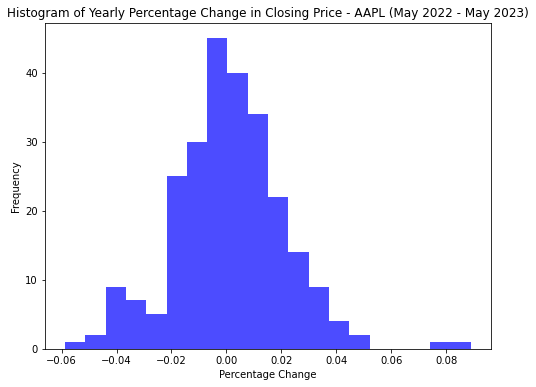

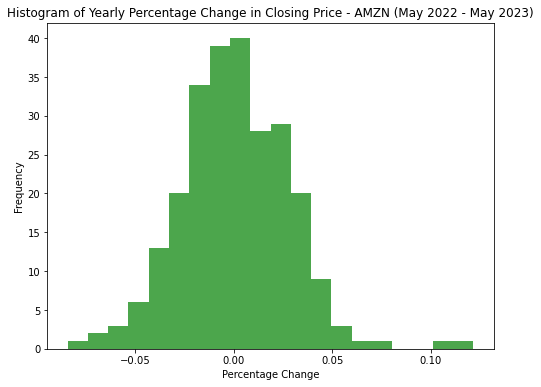

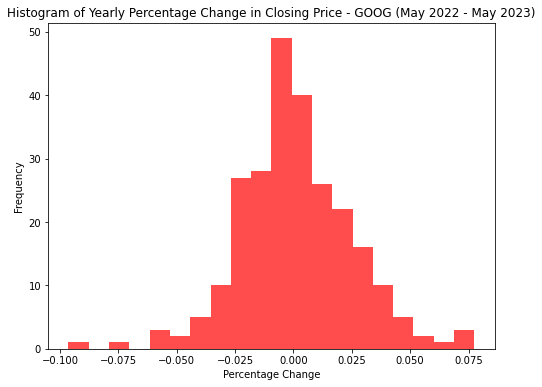

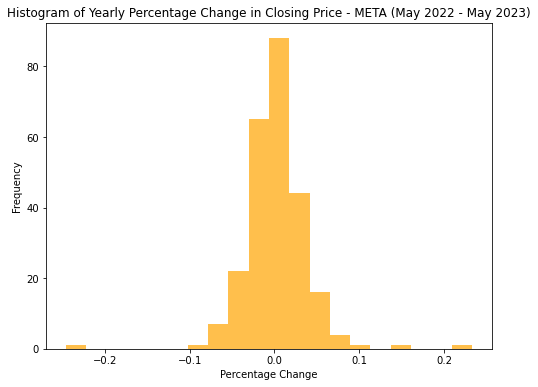

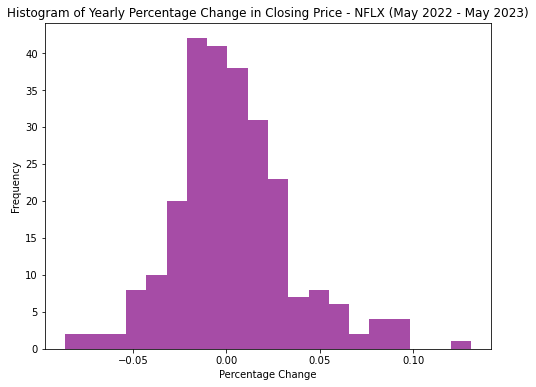

In [33]:
# Filter the DataFrame for the desired time range
start_date = pd.to_datetime('2022-05-01')
end_date = pd.to_datetime('2023-05-31')
df_filtered = df.loc[(df.index >= start_date) & (df.index <= end_date)]

# Group the filtered DataFrame by 'Ticker' column
groups = df_filtered.groupby('Ticker')

# Define a list of colors for each histogram
colors = ['blue', 'green', 'red', 'orange', 'purple']  # Add more colors if needed

# Iterate over each group and create separate histograms
for i, (ticker, group) in enumerate(groups):
    # Calculate the percentage change of the closing prices
    pct_change = group['Close'].pct_change()
    # Align the length of values with the length of the index
    pct_change = pct_change.reindex(group.index)
    
    # Plot a histogram for the current company with the specified color
    plt.figure(figsize=(8, 6))
    plt.hist(pct_change.dropna(), bins=20, alpha=0.7, color=colors[i % len(colors)])
    
    # Set the plot title and labels
    plt.title(f'Histogram of Yearly Percentage Change in Closing Price - {ticker} (May 2022 - May 2023)')
    plt.xlabel('Percentage Change')
    plt.ylabel('Frequency')
    
    # Display the plot for the current company
    plt.show();

The histogram illustrates the distribution of yearly percentage changes in the closing prices of different companies' stocks within the specified time range (May 2022 - May 2023). Each histogram represents a specific company, identified by its ticker symbol. 

The x-axis of the histogram represents the range of percentage changes, while the y-axis represents the frequency or count of occurrences for each range. The histogram is divided into bins, where each bin represents a range of percentage changes. The height of each bar in the histogram indicates the number of instances falling within that range.

By analyzing the histogram, we can gain insights into the volatility and distribution of price changes for each company during the given period. A wider and more spread-out distribution suggests higher price volatility, while a narrower distribution indicates more stable price behavior. Additionally, we can identify any patterns or outliers in the data that might be worth investigating further.

In [34]:
import seaborn as sns

In [35]:
from scipy.stats import gaussian_kde

### Density Plot 

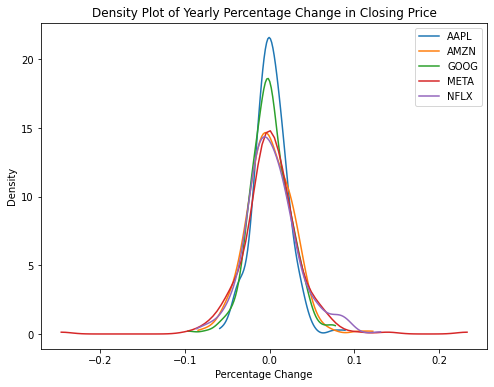

In [37]:
# Filter the DataFrame for the desired time range
start_date = pd.to_datetime('2022-05-01')
end_date = pd.to_datetime('2023-05-31')
df_filtered = df.loc[(df.index >= start_date) & (df.index <= end_date)]

# Group the filtered DataFrame by 'Ticker' column
groups = df_filtered.groupby('Ticker')

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Iterate over each group and create separate density plots
for ticker, group in groups:
    # Calculate the percentage change of the closing prices
    pct_change = group['Close'].pct_change()
    # Align the length of values with the length of the index
    pct_change = pct_change.reindex(group.index)

    # Compute the kernel density estimate
    kde = gaussian_kde(pct_change.dropna())

    # Generate x-values for the density plot
    x = np.linspace(pct_change.min(), pct_change.max(), num=100)

    # Plot the density line for the current company
    ax.plot(x, kde(x), label=ticker)

# Set the plot title and labels
ax.set_title('Density Plot of Yearly Percentage Change in Closing Price')
ax.set_xlabel('Percentage Change')
ax.set_ylabel('Density')

# Add a legend
ax.legend()

# Display the plot
plt.show()

## Model

## Evaluation

## Results

## Conclusion

## Next Steps